In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/house_pricing.csv'
df = pd.read_csv(url)
df.head()

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19


Future analysis and selection

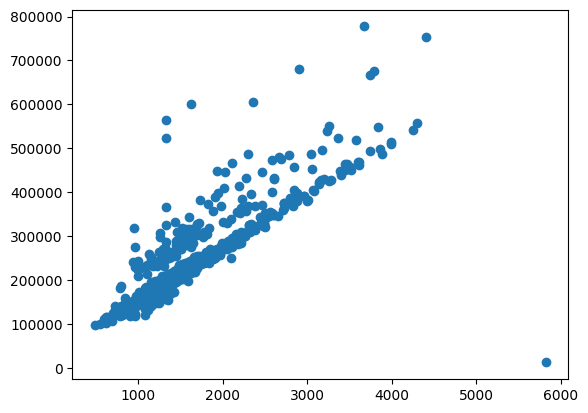

In [4]:
#relation between price and area
plt.scatter(df.SquareFeet, df.Price)

Check correlation between features and target when using linear models
- features are numeric
- predictions are numerical

Pearson Correlation: 0.851755035476082


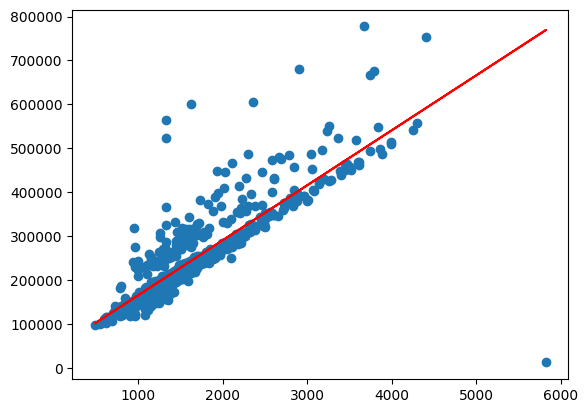

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['SquareFeet']], df.Price)
pred = model.predict(df[['SquareFeet']])
plt.scatter(df.SquareFeet, df.Price)
plt.plot(df.SquareFeet, pred, color='red')
#pearson correlation
pc= df.SquareFeet.corr(df.Price)
print('Pearson Correlation:', pc)

In [6]:
df.select_dtypes(include='number').corrwith(df.Price)

Beds          0.609677
Baths         0.632218
SquareFeet    0.851755
Price         1.000000
dtype: float64

Pearson correlation coefficient
- if the value is close to 1, strong positive correlation
- if the value is close to -1, strong negative correlation
- if the value is close to 0, no correlation

In [7]:
df.select_dtypes(include='number').columns

Index(['Beds', 'Baths', 'SquareFeet', 'Price'], dtype='object')

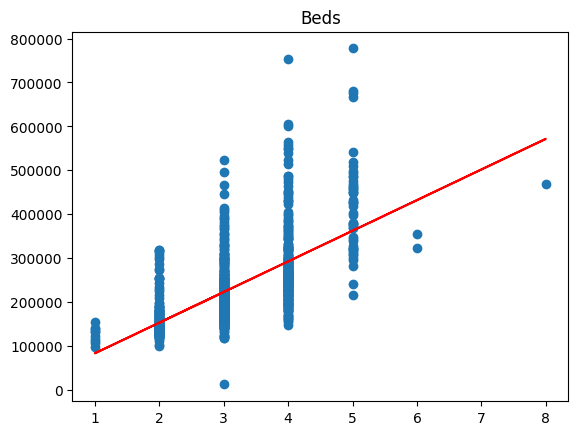

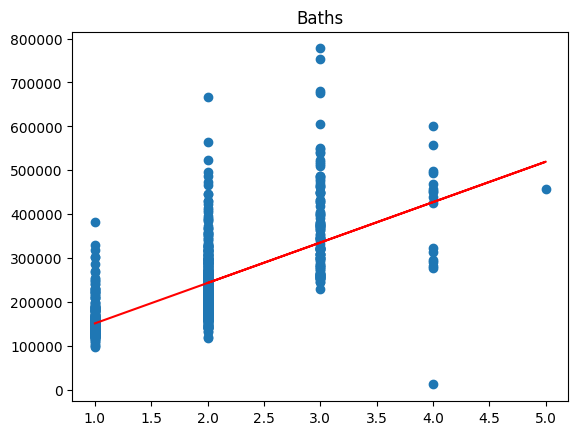

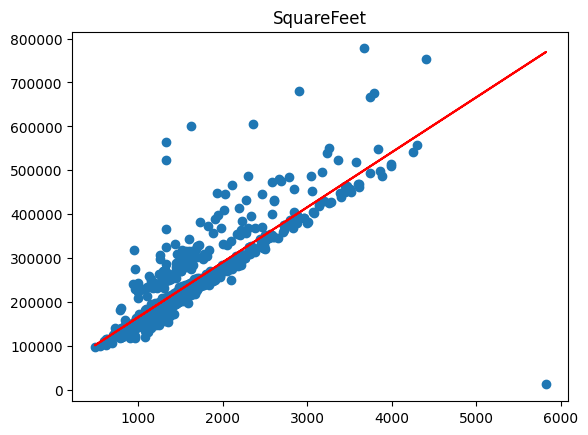

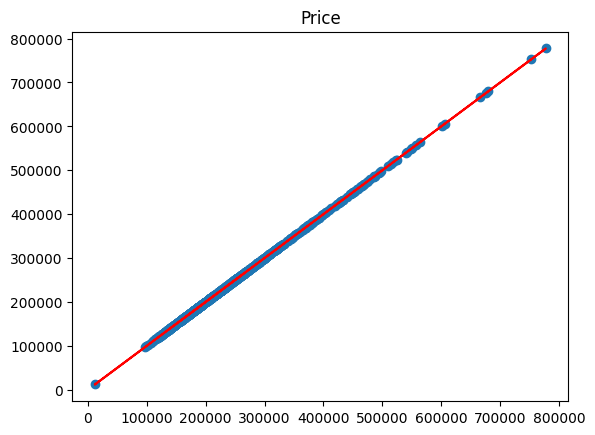

In [8]:
num_cols=df.select_dtypes(include='number').columns
for col in num_cols:
    plt.scatter(df[col], df.Price)
    plt.title(col)
    model = LinearRegression()
    model.fit(df[[col]], df.Price)
    plt.plot(df[col], model.predict(df[[col]]), color='red')
    plt.show()

for categorical independent variables with nuerical target

In [9]:
df.columns

Index(['City', 'Type', 'Beds', 'Baths', 'SquareFeet', 'Price'], dtype='object')

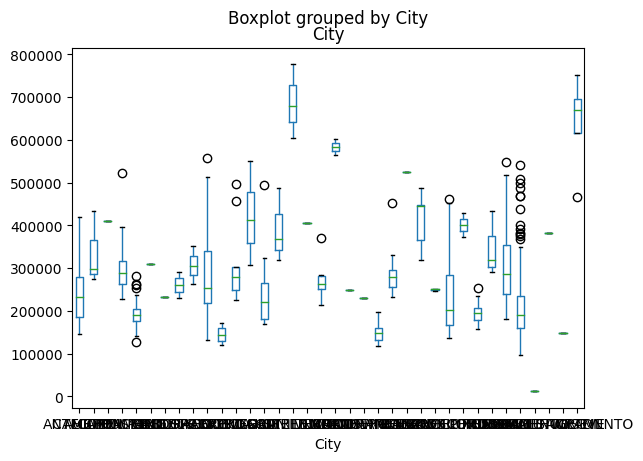

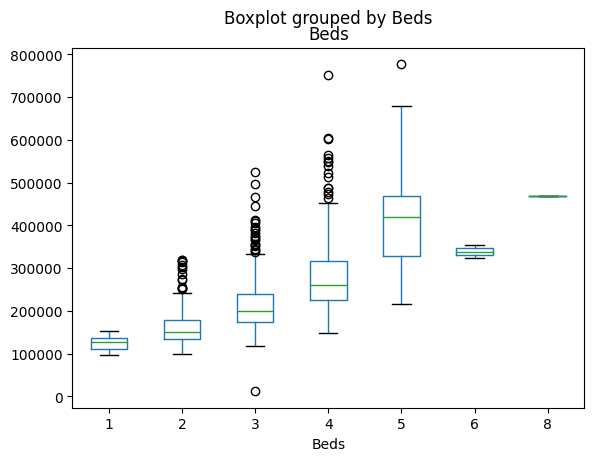

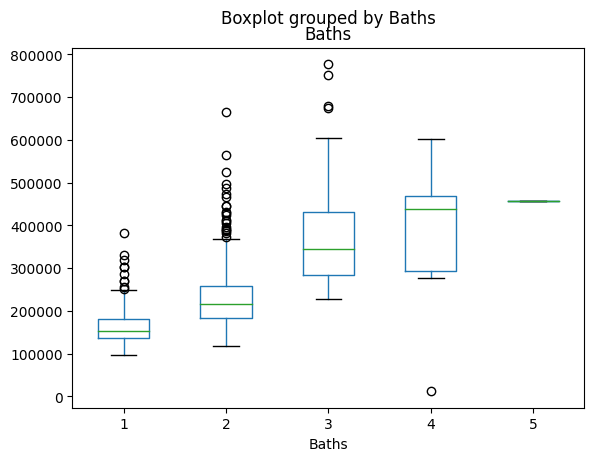

In [10]:
cat_cols = [ 'City', 'Beds', 'Baths',]
for col in cat_cols:
    df.boxplot(column='Price', by=col, grid=False)
    plt.title(col)

# Testing with anova
- for each features, calculate the f-statistic and p-value
- if p-value < 0.05, reject null hypothesis(means the column is not important)
- if p-value > 0.05, fail to reject null hypothesis(means the column is not impotant)

In [11]:
from scipy.stats import f_oneway
for col in cat_cols:
    print(col)
    groups = df.groupby(col).groups
    data = [df.Price[groups[i]] for i in groups]
    f, p = f_oneway(*data)
    print(f'F-Statistic: {f:.2f}, P-Value: {p:.2f}')

City
F-Statistic: 22.32, P-Value: 0.00
Beds
F-Statistic: 92.40, P-Value: 0.00
Baths
F-Statistic: 156.16, P-Value: 0.00


In [12]:
selected_cols = ['SquareFeet', 'Beds', 'Baths', 'Type']
X= df[selected_cols]
y= df.Price

In [13]:
X['Type'].value_counts()

Type
Residential     759
Condo            42
Multi-Family     13
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [15]:
num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(include='object').columns
num_pipe = Pipeline([
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', OneHotEncoder(), cat_cols)
])
model = Pipeline([
    ('pre', preprocessor),
    ('lr', LinearRegression())
])
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SquareFeet', 'Beds', 'Baths'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Type'], dtype='object'))])),
                ('lr', LinearRegression())])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Training Results")
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("R2:", r2_score(y_train, y_train_pred))
print('-'*50)
print("Testing Results")
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R2:", r2_score(y_test, y_test_pred))

Training Results
MSE: 2804452771.7999954
MAE: 27566.332276625693
R2: 0.7192813374579932
--------------------------------------------------
Testing Results
MSE: 1797354564.962476
MAE: 26397.229158240058
R2: 0.7621201560957283
